In [73]:
#Imports
%matplotlib inline
import pandas
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as  plt
import pandas as pd
import numpy as np
import sklearn.neighbors as nb

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler,LabelEncoder

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score, train_test_split

from pandas.plotting import scatter_matrix

pandas.set_option('display.max_columns', None)  
pandas.set_option('display.expand_frame_repr', False)
pandas.set_option('display.precision', 3)
warnings.simplefilter(action='ignore', category=FutureWarning)

In [74]:
data = pandas.read_csv('./data/Train.csv', sep=',', na_values=".")

In [75]:
data.describe(include='all')

,Gender,Height (cm),Weight (kg),Blood Pressure (s/d),Cholesterol Level (mg/dL),BMI,Blood Glucose Level (mg/dL),Bone Density (g/cm²),Vision Sharpness,Hearing Ability (dB),Physical Activity Level,Smoking Status,Alcohol Consumption,Diet,Chronic Diseases,Medication Use,Family History,Cognitive Function,Mental Health Status,Sleep Patterns,Stress Levels,Pollution Exposure,Sun Exposure,Education Level,Income Level,Age (years),Age_group
count,3000,3000.000,3000.000,3000,3000.000,3000.000,3000.000,3000.000,3000.000,3000.000,3000,3000,1799,3000,1701,1802,1549,3000.000,3000,3000,3000.000,3000.000,3000.000,2373,3000,3000.000,3000.000
unique,2,NaN,NaN,1606,NaN,NaN,NaN,NaN,NaN,NaN,3,3,2,4,3,2,3,NaN,4,3,NaN,NaN,NaN,3,3,NaN,NaN
top,Female,NaN,NaN,135/93,NaN,NaN,NaN,NaN,NaN,NaN,Moderate,Former,Occasional,Balanced,Hypertension,Regular,Diabetes,NaN,Good,Normal,NaN,NaN,NaN,Undergraduate,Medium,NaN,NaN
freq,1511,NaN,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN,1407,1181,1057,1183,676,1063,645,NaN,1073,1519,NaN,NaN,NaN,884,1223,NaN,NaN
mean,NaN,168.591,72.537,NaN,234.030,25.550,126.654,0.932,0.475,47.016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.868,NaN,NaN,5.477,5.029,5.956,NaN,NaN,53.486,1.219
std,NaN,9.293,13.191,NaN,24.521,4.367,18.226,0.444,0.210,14.336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.756,NaN,NaN,2.585,2.871,3.475,NaN,NaN,20.570,0.721
min,NaN,141.131,32.538,NaN,148.812,12.050,69.867,-0.220,0.200,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.382,NaN,NaN,1.000,0.006,0.002,NaN,NaN,18.000,0.000
25%,NaN,161.630,63.223,NaN,216.757,22.454,114.393,0.561,0.282,36.735,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.648,NaN,NaN,3.222,2.607,2.873,NaN,NaN,36.000,1.000
50%,NaN,168.216,71.449,NaN,234.377,25.352,126.802,0.940,0.462,46.964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.015,NaN,NaN,5.497,5.096,5.957,NaN,NaN,53.000,1.000
75%,NaN,175.523,81.703,NaN,250.647,28.404,139.377,1.295,0.639,56.829,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.087,NaN,NaN,7.680,7.476,8.991,NaN,NaN,72.000,2.000


In [76]:
# Eliminar la columna de les edats irrellevants pel problema
data = data.drop(['Age (years)'], axis=1)
print(data[:5])

   Gender  Height (cm)  Weight (kg) Blood Pressure (s/d)  Cholesterol Level (mg/dL)     BMI  Blood Glucose Level (mg/dL)  Bone Density (g/cm²)  Vision Sharpness  Hearing Ability (dB) Physical Activity Level Smoking Status Alcohol Consumption        Diet Chronic Diseases Medication Use Family History  Cognitive Function Mental Health Status Sleep Patterns  Stress Levels  Pollution Exposure  Sun Exposure Education Level Income Level  Age_group
0    Male      171.148       86.185              151/109                    259.466  29.423                      157.653                 0.133             0.200                58.786                Moderate         Former                 NaN    Low-carb              NaN            NaN            NaN              44.059                 Good       Insomnia          2.797               5.142         7.109             NaN       Medium          2
1    Male      172.946       79.642              134/112                    263.630  26.627                 

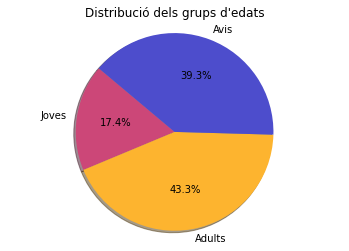

In [77]:
jove = len(data[data['Age_group'] == 0])
adult = len(data[data['Age_group'] == 1])
avi = adults = len(data[data['Age_group'] == 2])

#pie chart
labels = ['Joves', 'Adults', 'Avis']
sizes = [jove, adult, avi]
colors2=[(0.798216, 0.280197, 0.469538, 1.0), (0.993814, 0.704741, 0.183043, 1.0), (0.3, 0.3, 0.8)]

plt.pie(sizes, labels=labels, colors=colors2, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title("Distribució dels grups d'edats")
plt.show()

In [78]:
#Comprovar quins camps tenen valors nulls
data.isnull().any()

Gender                         False
Height (cm)                    False
Weight (kg)                    False
Blood Pressure (s/d)           False
Cholesterol Level (mg/dL)      False
BMI                            False
Blood Glucose Level (mg/dL)    False
Bone Density (g/cm²)           False
Vision Sharpness               False
Hearing Ability (dB)           False
Physical Activity Level        False
Smoking Status                 False
Alcohol Consumption             True
Diet                           False
Chronic Diseases                True
Medication Use                  True
Family History                  True
Cognitive Function             False
Mental Health Status           False
Sleep Patterns                 False
Stress Levels                  False
Pollution Exposure             False
Sun Exposure                   False
Education Level                 True
Income Level                   False
Age_group                      False
dtype: bool

In [79]:
values = {"Alcohol Consumption": 'Never', "Chronic Diseases": 'No Disease', "Medication Use": 'No', "Family History": 'No Disease', "Education Level": 'No Education'}
data = data.fillna(value=values)
data.isnull().any()

Gender                         False
Height (cm)                    False
Weight (kg)                    False
Blood Pressure (s/d)           False
Cholesterol Level (mg/dL)      False
BMI                            False
Blood Glucose Level (mg/dL)    False
Bone Density (g/cm²)           False
Vision Sharpness               False
Hearing Ability (dB)           False
Physical Activity Level        False
Smoking Status                 False
Alcohol Consumption            False
Diet                           False
Chronic Diseases               False
Medication Use                 False
Family History                 False
Cognitive Function             False
Mental Health Status           False
Sleep Patterns                 False
Stress Levels                  False
Pollution Exposure             False
Sun Exposure                   False
Education Level                False
Income Level                   False
Age_group                      False
dtype: bool

In [80]:
# Comprovació de la existència de files duplicades
files_duplicades = data[data.duplicated(keep = False)]
print("Numero de files duplicades:" + str(files_duplicades.sum()))

Numero de files duplicades:Gender                           0
Height (cm)                    0.0
Weight (kg)                    0.0
Blood Pressure (s/d)             0
Cholesterol Level (mg/dL)      0.0
BMI                            0.0
Blood Glucose Level (mg/dL)    0.0
Bone Density (g/cm²)           0.0
Vision Sharpness               0.0
Hearing Ability (dB)           0.0
Physical Activity Level          0
Smoking Status                   0
Alcohol Consumption              0
Diet                             0
Chronic Diseases                 0
Medication Use                   0
Family History                   0
Cognitive Function             0.0
Mental Health Status             0
Sleep Patterns                   0
Stress Levels                  0.0
Pollution Exposure             0.0
Sun Exposure                   0.0
Education Level                  0
Income Level                     0
Age_group                        0
dtype: object


In [81]:
# Canviar de tipus categòric a numeral

gender_st = {'Male': 0, 'Female': 1}
data.replace({"Gender": gender_st}, inplace=True)
status_st = {'Poor': 0, 'Fair': 1, 'Good': 2, 'Excellent': 3}
data.replace({"Mental Health Status": status_st}, inplace=True)
smoking_st = {'Current': 0, 'Former': 1, 'Never': 2}
data.replace({"Smoking Status": smoking_st}, inplace=True)
drinking_st = {'Frequent': 0, 'Occasional': 1, 'Never': 2}
data.replace({"Alcohol Consumption": drinking_st}, inplace=True)
medication_st = {'Regular': 0, 'Occasional': 1, 'No': 2}
data.replace({"Medication Use": medication_st}, inplace=True)
physical_st = {'Low': 0, 'Moderate': 1, 'High': 2}
data.replace({"Physical Activity Level": physical_st}, inplace=True)
diet_st = {'High-fat': 0, 'Low-carb': 1, 'Vegetarian': 2, 'Balanced': 3}
data.replace({"Diet": diet_st}, inplace=True)
sleep_st = {'Insomnia': 0, 'Normal': 1, 'Excessive': 2}
data.replace({"Sleep Patterns": sleep_st}, inplace=True)
income_st = {'Low': 0, 'Medium': 1, 'High': 2}
data.replace({"Income Level": income_st}, inplace=True)
education_st = {'No Education': 0, 'Undergraduate': 1, 'High School': 2, 'Postgraduate': 3}
data.replace({"Education Level": education_st}, inplace=True)
chronic_st = {'No Disease': 0, 'Hypertension': 1, 'Diabetes': 2, 'Heart Disease': 3}
data.replace({"Chronic Diseases": chronic_st}, inplace=True)
data.replace({"Family History": chronic_st}, inplace=True)

In [82]:
for i,element in zip(range(len(data['Blood Pressure (s/d)'])),data['Blood Pressure (s/d)']):
    valors = element.split('/')
    estat = 0
    systolic = int(valors[0])
    diastolic = int(valors[1])
    if systolic < 120 and diastolic < 80:
        estat = 0 #healthy
    elif systolic >= 120 and systolic <= 129 and diastolic < 80:
        estat = 1 #elevated
    elif systolic >= 130 and systolic <= 139 or diastolic >= 80 and diastolic <= 89:
        estat = 2 # hypertension 1
    else:
        estat = 3 #hypertension 2
    data.loc[i, 'Blood Pressure (s/d)'] = int(estat)
print(data[:5])

   Gender  Height (cm)  Weight (kg) Blood Pressure (s/d)  Cholesterol Level (mg/dL)     BMI  Blood Glucose Level (mg/dL)  Bone Density (g/cm²)  Vision Sharpness  Hearing Ability (dB)  Physical Activity Level  Smoking Status  Alcohol Consumption  Diet  Chronic Diseases  Medication Use  Family History  Cognitive Function  Mental Health Status  Sleep Patterns  Stress Levels  Pollution Exposure  Sun Exposure  Education Level  Income Level  Age_group
0       0      171.148       86.185                    3                    259.466  29.423                      157.653                 0.133             0.200                58.786                        1               1                    2     1                 0               2               0              44.059                     2               0          2.797               5.142         7.109                0             1          2
1       0      172.946       79.642                    2                    263.630  26.627         

<Axes: >

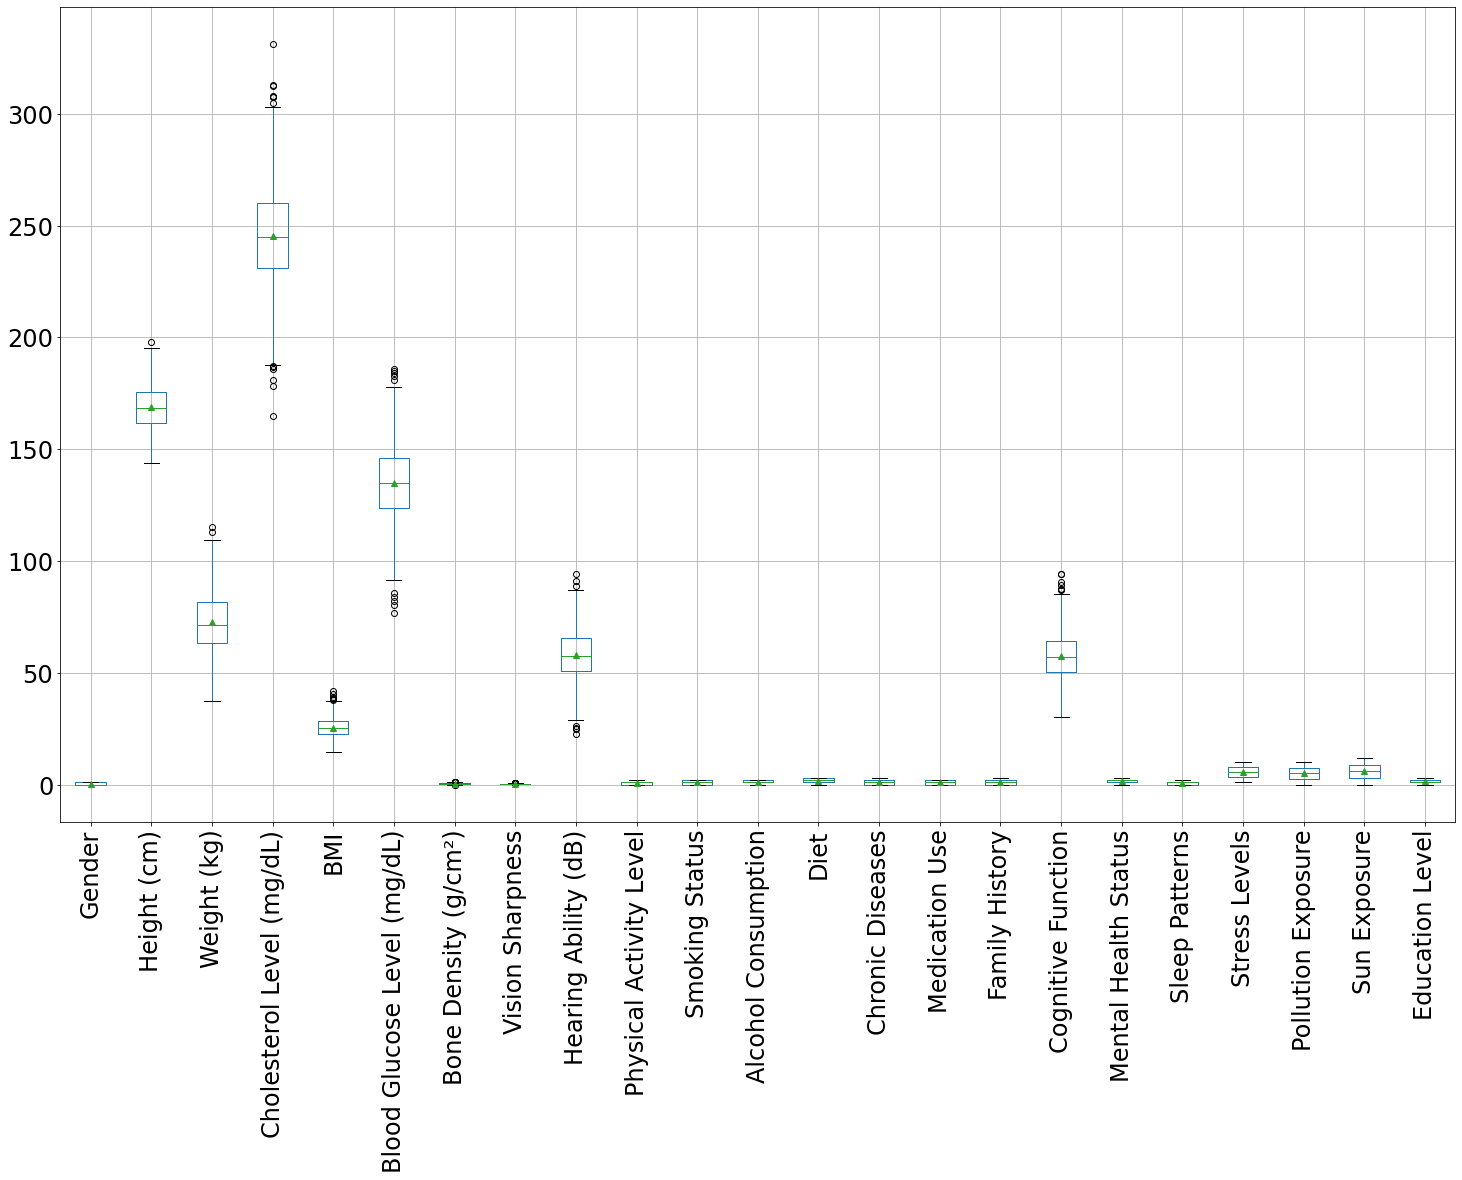

In [83]:
avis = data[data['Age_group'] == 2]
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
columns = list(avis.select_dtypes(include=numerics))
columns = columns[:len(columns)-2]
avis.boxplot(meanline=False,showmeans=True,rot=90,return_type='axes', column=columns, figsize=(25,15), fontsize=24)

<Axes: >

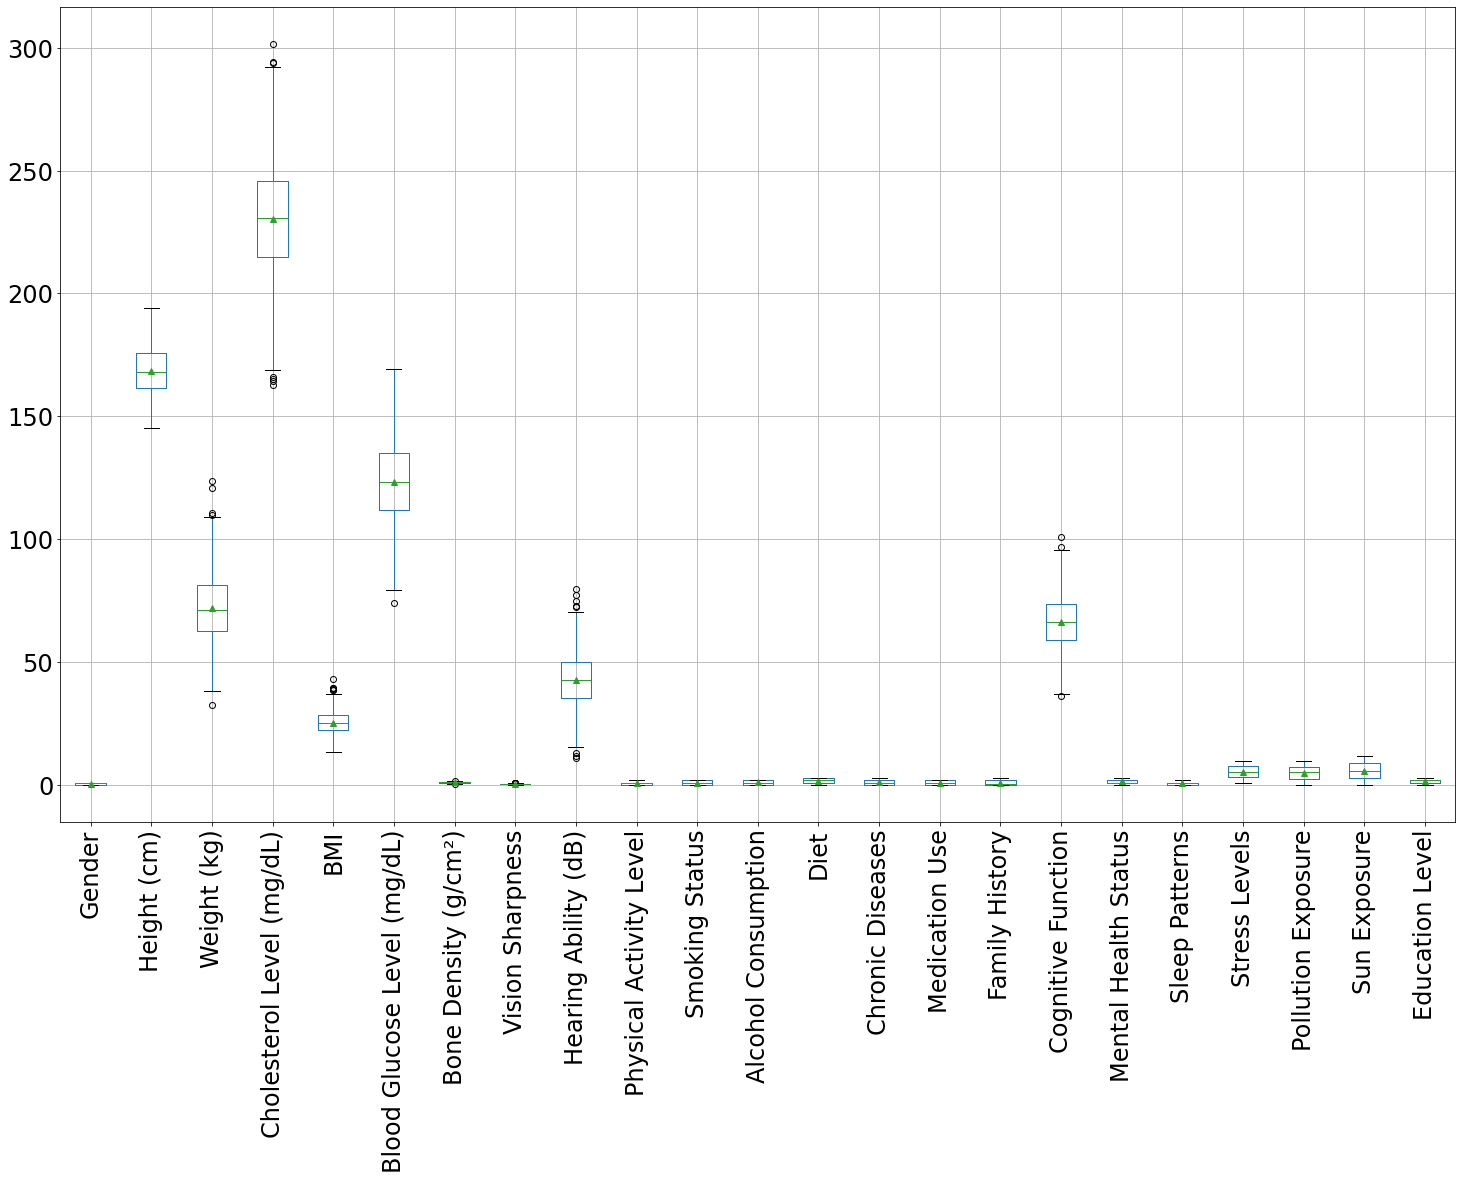

In [84]:
adults = data[data['Age_group'] == 1]
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
columns = list(adults.select_dtypes(include=numerics))
columns = columns[:len(columns)-2]
adults.boxplot(meanline=False,showmeans=True,rot=90,return_type='axes', column=columns, figsize=(25,15), fontsize=24)

<Axes: >

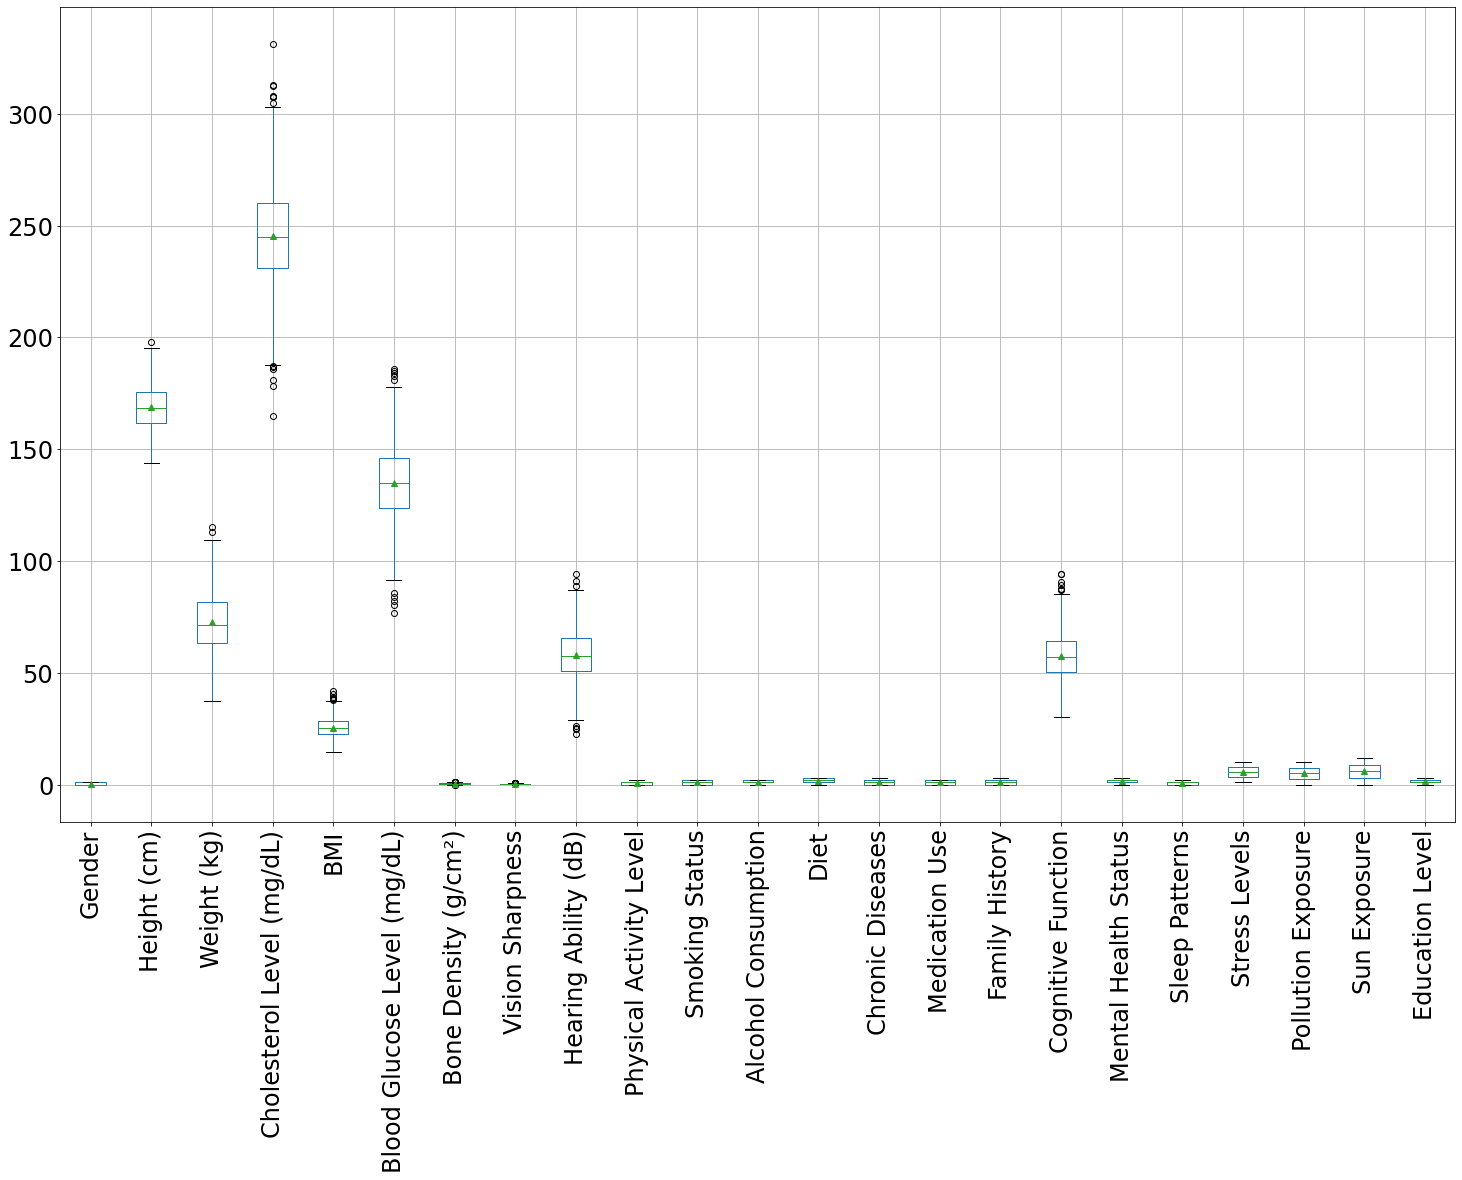

In [85]:
joves = data[data['Age_group'] == 2]
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
columns = list(joves.select_dtypes(include=numerics))
columns = columns[:len(columns)-2]
joves.boxplot(meanline=False,showmeans=True,rot=90,return_type='axes', column=columns, figsize=(25,15), fontsize=24)

In [86]:
joves["Height (cm)"].mean()-2*joves["Height (cm)"].std()

np.float64(150.02845770842129)

In [87]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
columns = list(joves.select_dtypes(include=numerics))
columns = columns[:len(columns)-2]
tjoves = []
for c in columns:
    df = pandas.concat([joves[joves[c] > joves[c].mean() + 2*joves[c].std()], joves[joves[c] < joves[c].mean() - 2*joves[c].std()]])
    tjoves.append(df)
tadults = []
for c in columns:
    df = pandas.concat([adults[adults[c] > adults[c].mean() + 2*adults[c].std()], adults[adults[c] < adults[c].mean() - 2*adults[c].std()]])
    tadults.append(df)
tavis = []
for c in columns:
    df = pandas.concat([avis[avis[c] > avis[c].mean() + 2*avis[c].std()], avis[avis[c] < avis[c].mean() - 2*avis[c].std()]])
    tavis.append(df)

In [88]:
n=int(input())
print(columns[n])
print("Valors superiors a " + str(joves[columns[n]].mean() + 2*joves[columns[n]].std()) + " i inferiors a " + str(joves[columns[n]].mean() - 2*joves[columns[n]].std()))
tjoves[n]

Weight (kg)
Valors superiors a 98.84340306123438 i inferiors a 46.52417919527865


,Gender,Height (cm),Weight (kg),Blood Pressure (s/d),Cholesterol Level (mg/dL),BMI,Blood Glucose Level (mg/dL),Bone Density (g/cm²),Vision Sharpness,Hearing Ability (dB),Physical Activity Level,Smoking Status,Alcohol Consumption,Diet,Chronic Diseases,Medication Use,Family History,Cognitive Function,Mental Health Status,Sleep Patterns,Stress Levels,Pollution Exposure,Sun Exposure,Education Level,Income Level,Age_group
12,0,173.338,102.464,3,289.219,34.102,124.846,0.651,0.402,84.370,1,1,0,2,3,0,3,61.342,1,1,2.157,8.112,9.848,1,2,2
42,0,170.894,102.930,3,232.859,35.244,164.747,0.403,0.200,58.900,1,2,2,1,1,1,3,54.279,2,1,9.493,4.197,7.662,2,0,2
157,0,166.906,107.075,3,246.181,38.437,117.518,0.552,0.202,63.278,0,2,1,1,2,0,2,38.844,3,1,2.594,0.984,11.481,1,2,2
360,0,170.704,106.177,3,224.363,36.437,135.633,0.829,0.351,47.375,2,1,0,1,1,0,2,63.255,1,1,1.355,0.145,1.431,1,1,2
537,0,170.423,105.450,3,253.119,36.307,113.870,0.429,0.200,40.523,0,1,1,3,3,0,3,76.466,3,1,2.587,4.084,1.340,2,1,2
552,0,185.936,115.343,2,231.589,33.363,125.921,0.842,0.369,60.003,1,1,2,2,1,0,2,77.064,2,1,7.900,9.388,5.128,1,1,2
558,0,181.543,105.947,3,266.661,32.146,113.715,0.178,0.200,59.240,1,1,2,2,2,0,0,55.075,0,0,5.153,9.380,2.792,0,2,2
582,0,165.674,100.629,2,228.411,36.662,142.059,0.420,0.200,63.689,0,1,2,2,2,1,3,56.117,2,1,4.513,6.545,3.052,2,0,2
775,0,170.403,100.114,3,236.237,34.478,101.218,0.559,0.385,45.620,0,0,0,3,1,0,3,63.236,3,0,4.154,7.184,4.457,1,1,2
1171,0,178.005,101.033,3,242.524,31.886,153.909,0.573,0.200,46.864,0,0,1,3,1,0,1,50.857,3,1,3.188,6.364,6.226,2,1,2


In [89]:
n=int(input())
print(columns[n])
print("Valors superiors a " + str(adults[columns[n]].mean() + 2*adults[columns[n]].std()) + " i inferiors a " + str(adults[columns[n]].mean() - 2*adults[columns[n]].std()))
tadults[n]

Weight (kg)
Valors superiors a 98.97467470889501 i inferiors a 45.47629909351917


,Gender,Height (cm),Weight (kg),Blood Pressure (s/d),Cholesterol Level (mg/dL),BMI,Blood Glucose Level (mg/dL),Bone Density (g/cm²),Vision Sharpness,Hearing Ability (dB),Physical Activity Level,Smoking Status,Alcohol Consumption,Diet,Chronic Diseases,Medication Use,Family History,Cognitive Function,Mental Health Status,Sleep Patterns,Stress Levels,Pollution Exposure,Sun Exposure,Education Level,Income Level,Age_group
54,0,178.232,108.165,3,213.979,34.050,127.026,1.012,0.716,31.414,2,0,2,3,1,1,3,67.432,2,1,8.342,3.735,6.318,0,0,1
56,0,183.572,99.481,3,221.320,29.521,128.121,0.955,0.441,61.223,1,1,1,3,2,0,1,74.529,2,2,7.954,2.649,7.743,1,1,1
72,0,182.371,104.400,3,244.627,31.390,116.977,1.250,0.672,23.375,1,0,2,1,0,2,0,63.309,0,0,4.146,1.141,1.815,2,0,1
73,0,178.290,102.977,2,238.567,32.395,151.863,1.168,0.507,27.837,2,0,1,0,2,0,1,67.120,3,1,8.258,4.592,0.623,1,0,1
134,0,168.358,100.968,3,218.463,35.622,143.719,0.886,0.458,62.202,2,1,0,2,0,2,0,60.342,1,2,2.234,7.339,7.587,1,1,1
159,0,171.146,104.932,3,217.003,35.824,155.232,0.813,0.333,45.521,1,1,1,0,0,2,0,84.179,1,1,7.680,0.252,4.258,1,1,1
218,0,167.536,108.548,3,220.937,38.673,140.368,1.290,0.604,36.938,0,2,2,0,1,1,0,53.296,3,2,5.442,4.536,0.457,1,1,1
220,0,175.298,101.449,3,255.867,33.014,128.801,0.668,0.416,67.311,0,1,2,0,0,1,0,71.790,0,0,3.985,7.231,6.093,2,0,1
249,0,175.728,104.727,2,212.047,33.914,86.274,0.966,0.486,46.356,1,0,2,1,0,2,0,72.285,1,1,4.391,5.336,0.003,2,0,1
435,0,178.774,103.057,2,235.496,32.246,152.399,0.808,0.426,30.489,1,0,2,3,2,0,3,67.241,0,0,9.928,1.028,0.636,3,2,1


In [90]:
n=int(input())
print(columns[n])
print("Valors superiors a " + str(avis[columns[n]].mean() + 2*avis[columns[n]].std()) + " i inferiors a " + str(avis[columns[n]].mean() - 2*avis[columns[n]].std()))
tavis[n]

Weight (kg)
Valors superiors a 98.84340306123438 i inferiors a 46.52417919527865


,Gender,Height (cm),Weight (kg),Blood Pressure (s/d),Cholesterol Level (mg/dL),BMI,Blood Glucose Level (mg/dL),Bone Density (g/cm²),Vision Sharpness,Hearing Ability (dB),Physical Activity Level,Smoking Status,Alcohol Consumption,Diet,Chronic Diseases,Medication Use,Family History,Cognitive Function,Mental Health Status,Sleep Patterns,Stress Levels,Pollution Exposure,Sun Exposure,Education Level,Income Level,Age_group
12,0,173.338,102.464,3,289.219,34.102,124.846,0.651,0.402,84.370,1,1,0,2,3,0,3,61.342,1,1,2.157,8.112,9.848,1,2,2
42,0,170.894,102.930,3,232.859,35.244,164.747,0.403,0.200,58.900,1,2,2,1,1,1,3,54.279,2,1,9.493,4.197,7.662,2,0,2
157,0,166.906,107.075,3,246.181,38.437,117.518,0.552,0.202,63.278,0,2,1,1,2,0,2,38.844,3,1,2.594,0.984,11.481,1,2,2
360,0,170.704,106.177,3,224.363,36.437,135.633,0.829,0.351,47.375,2,1,0,1,1,0,2,63.255,1,1,1.355,0.145,1.431,1,1,2
537,0,170.423,105.450,3,253.119,36.307,113.870,0.429,0.200,40.523,0,1,1,3,3,0,3,76.466,3,1,2.587,4.084,1.340,2,1,2
552,0,185.936,115.343,2,231.589,33.363,125.921,0.842,0.369,60.003,1,1,2,2,1,0,2,77.064,2,1,7.900,9.388,5.128,1,1,2
558,0,181.543,105.947,3,266.661,32.146,113.715,0.178,0.200,59.240,1,1,2,2,2,0,0,55.075,0,0,5.153,9.380,2.792,0,2,2
582,0,165.674,100.629,2,228.411,36.662,142.059,0.420,0.200,63.689,0,1,2,2,2,1,3,56.117,2,1,4.513,6.545,3.052,2,0,2
775,0,170.403,100.114,3,236.237,34.478,101.218,0.559,0.385,45.620,0,0,0,3,1,0,3,63.236,3,0,4.154,7.184,4.457,1,1,2
1171,0,178.005,101.033,3,242.524,31.886,153.909,0.573,0.200,46.864,0,0,1,3,1,0,1,50.857,3,1,3.188,6.364,6.226,2,1,2


<Axes: xlabel='Age_group'>

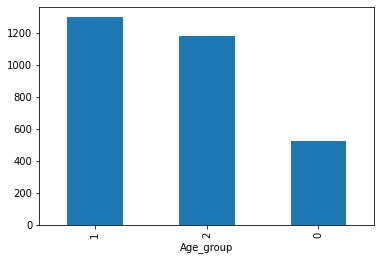

In [91]:
data.Age_group.value_counts().plot(kind='bar')

Scatter matrixes for correlations betwen numerical variables 


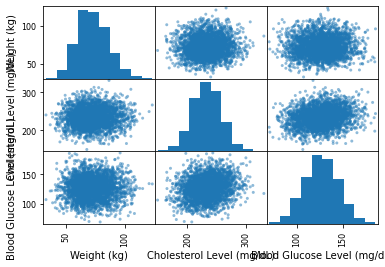

In [92]:
scatter_matrix(data[['Weight (kg)', 'Cholesterol Level (mg/dL)', 'Blood Glucose Level (mg/dL)']])
print('Scatter matrixes for correlations betwen numerical variables ')

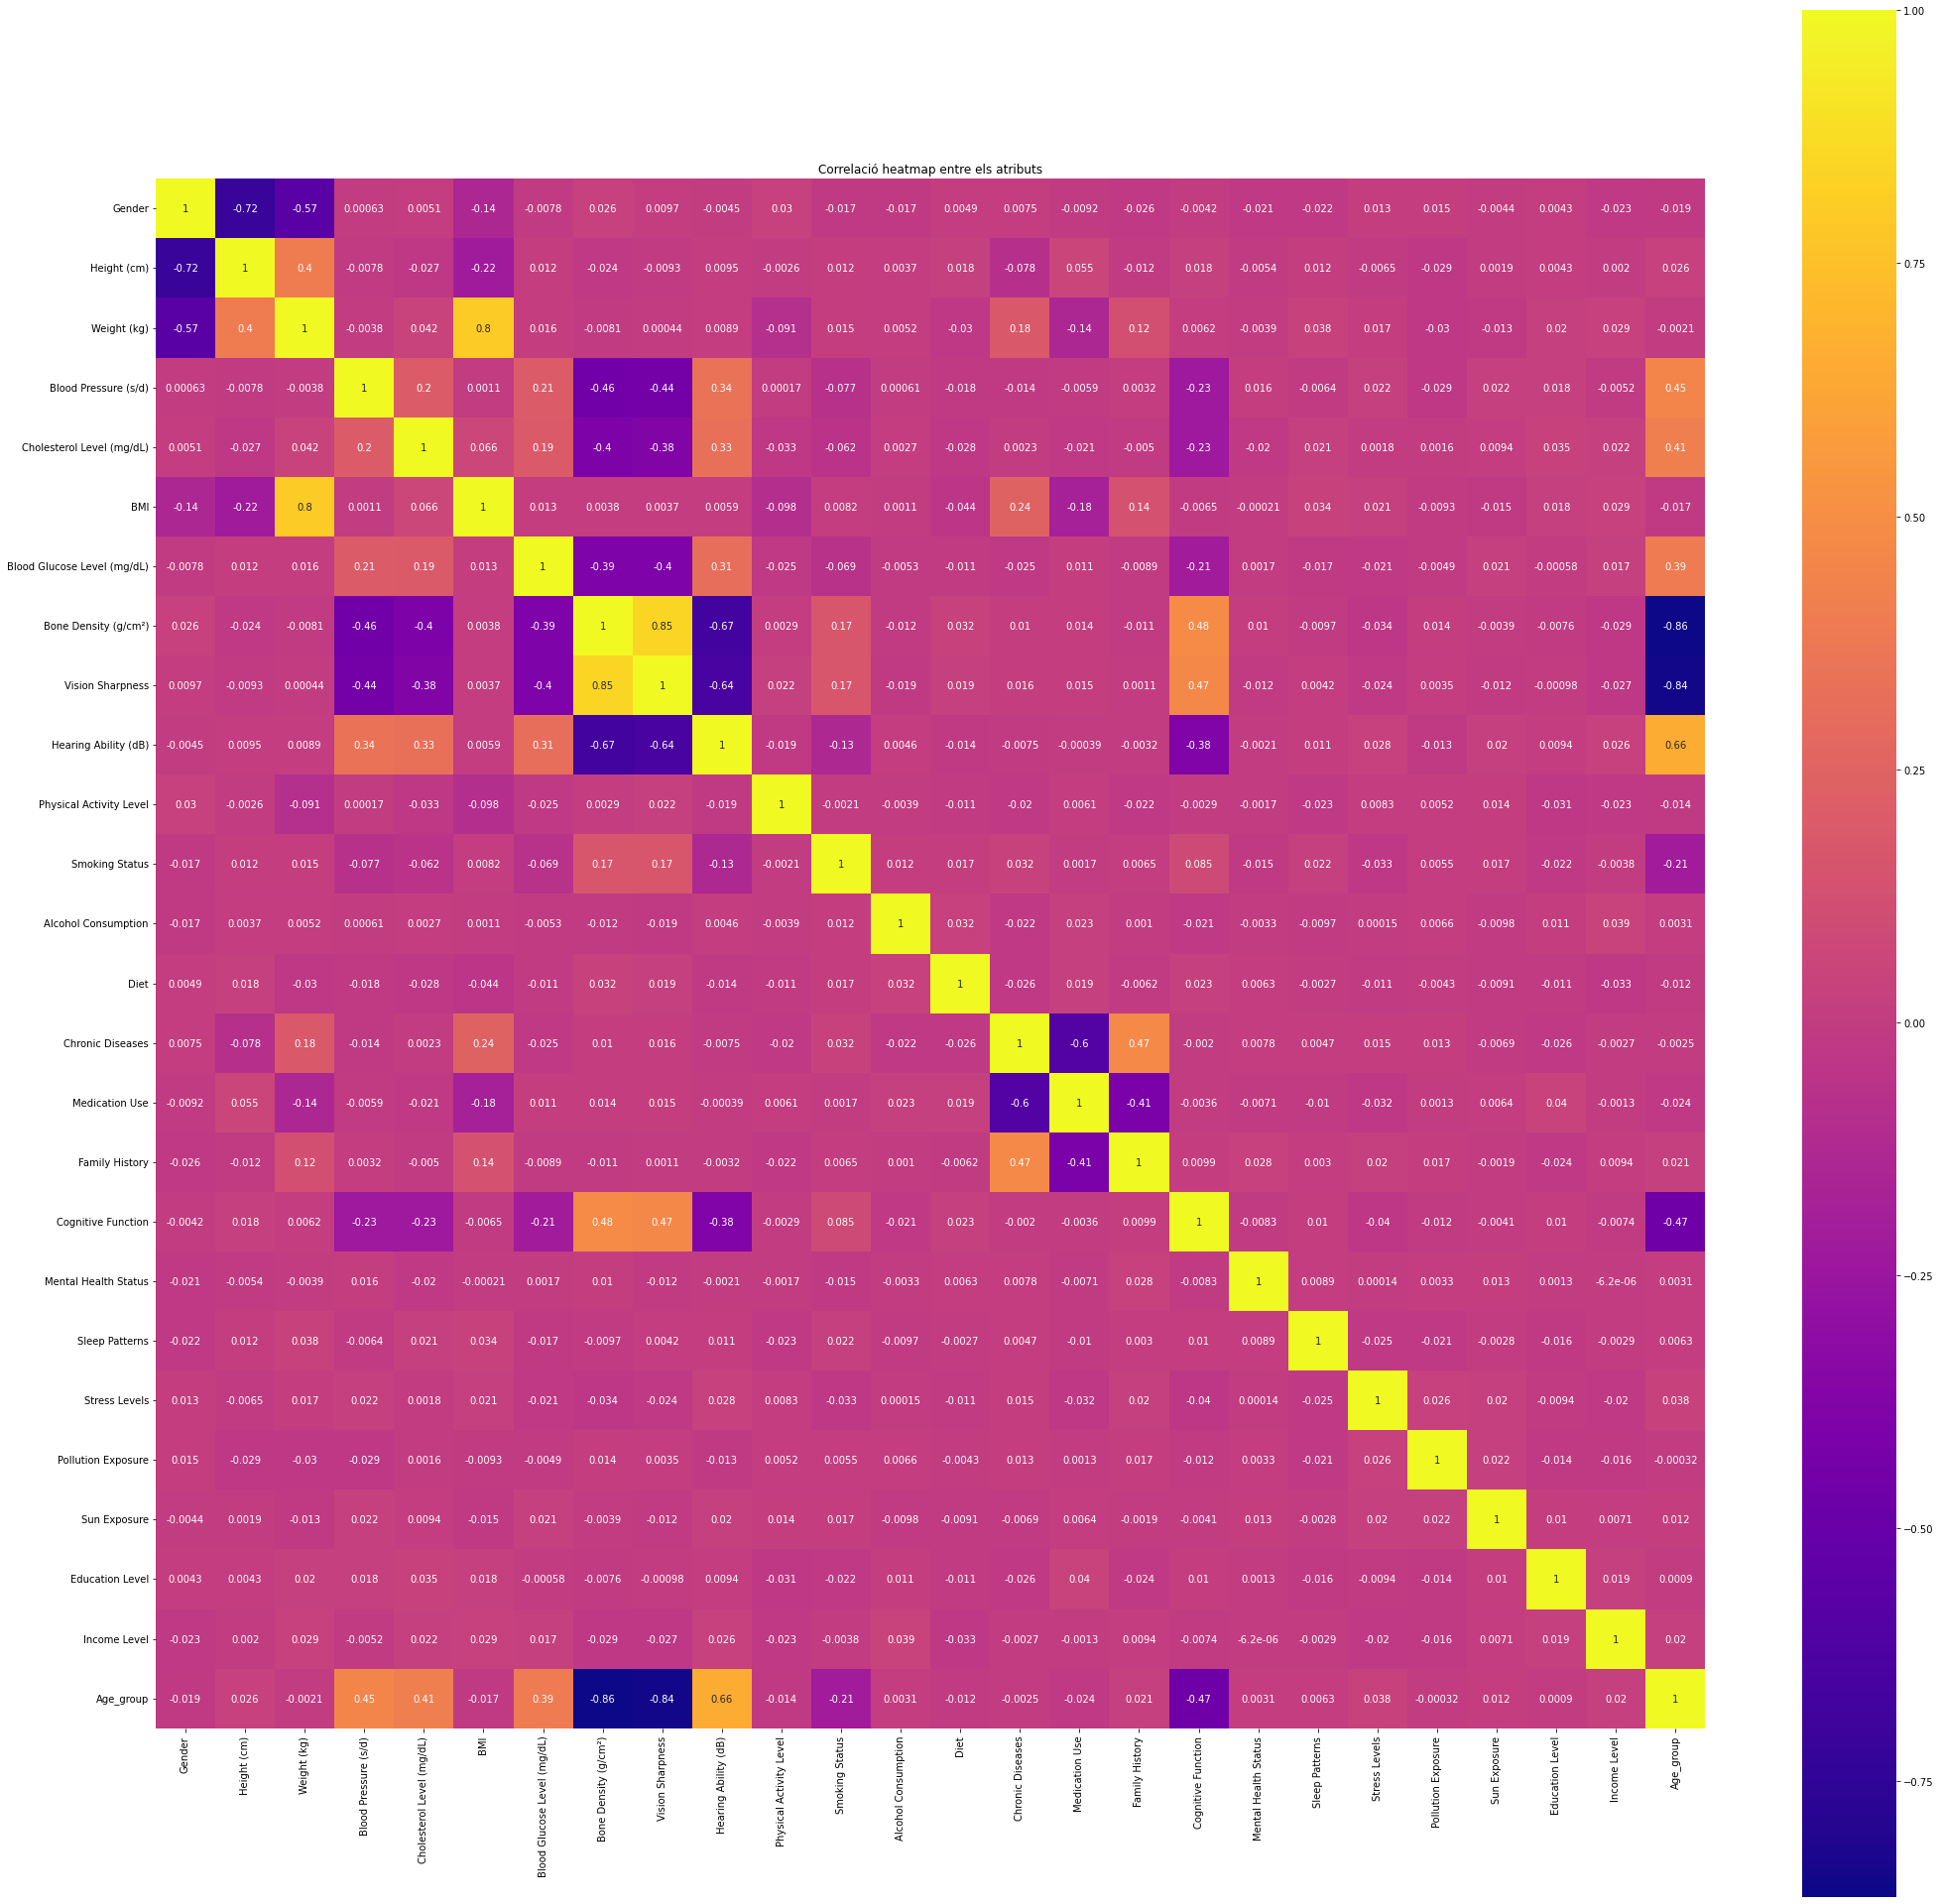

In [93]:
#Passar columnes no numèriques a numèriques
corr = data.corr()
fig, ax = plt.subplots(figsize=(35, 35))
sns.heatmap(corr, cmap='plasma', annot=True, square=True)

plt.title("Correlació heatmap entre els atributs")
plt.show()

### - Divisió de les dades

In [94]:
X = data.drop('Age_group', axis = 1)
y = data['Age_group']

In [95]:
#Ratios de Training i Test
split_ratios = [(0.6, 0.2), (0.7, 0.15), (0.8, 0.1)]
results = []

for train_ratio, val_ratio in split_ratios:
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=1-train_ratio, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=val_ratio/(val_ratio + (1-train_ratio-val_ratio)), random_state=42)

    #Crear model
    model = DecisionTreeClassifier()
    model.fit(X_train, y_train)

    val_accuracy = accuracy_score(y_val, model.predict(X_val))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))

    #Guardar resultats segosn el ratio
    results.append({'train_ratio': train_ratio, 'val_ratio': val_ratio, 'val_accuracy': val_accuracy, 'test_accuracy': test_accuracy})

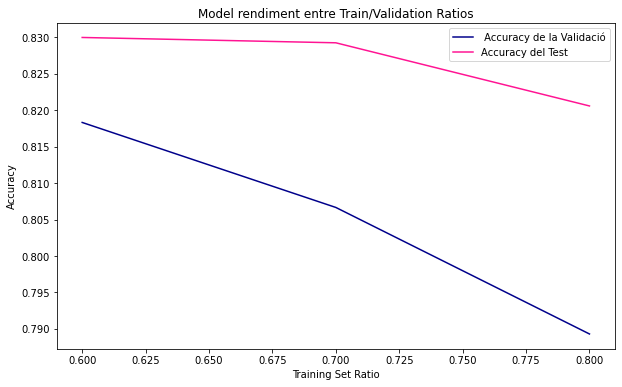

In [96]:
# Representació grafica entre ratios
train_ratios = [r['train_ratio'] for r in results]
val_accuracies = [r['val_accuracy'] for r in results]
test_accuracies = [r['test_accuracy'] for r in results]

plt.figure(figsize=(10, 6))
plt.plot(train_ratios, val_accuracies, label=' Accuracy de la Validació',color='darkblue')
plt.plot(train_ratios, test_accuracies, label='Accuracy del Test',color='deeppink')
plt.xlabel('Training Set Ratio')
plt.ylabel('Accuracy')
plt.title('Model rendiment entre Train/Validation Ratios')
plt.legend()
plt.show()

## <b>Models de mineria de dades</b>

### - Normalització

In [97]:
data_sf = data.copy()

#Estudiants graduats o han abandonat
data_sf = data_sf[(data_sf['Age_group'] == 0) | (data_sf['Age_group'] == 1) | (data_sf['Age_group'] == 2)]

#Passar de categoric a numeral
data_sf['Age_group'] = LabelEncoder().fit_transform(data_sf['Age_group'])
data_sf.shape

(3000, 26)

In [98]:
#trobar millors parametres- max depth per randomforest
scaler = StandardScaler()

#guardar a X tots els atributs menys el target, a Y el target
X = data_sf.drop('Age_group', axis=1)
y = data_sf['Age_group']

scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(scaled, y, test_size=0.2, random_state=10)

param_grid = {'max_depth': [5, 10, 15, 20, None]}


#Grid busqueda per cassificador validation
grid_search = GridSearchCV(RandomForestClassifier(n_estimators=100, random_state=20), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print('Millor  max_depth trobada:', grid_search.best_params_['max_depth'])

Millor  max_depth trobada: 10



 INFORME MODEL SINGLE FOLD CV 

              precision    recall  f1-score   support

           0       0.81      0.88      0.85       104
           1       0.90      0.87      0.89       263
           2       0.95      0.94      0.94       233

    accuracy                           0.90       600
   macro avg       0.89      0.90      0.89       600
weighted avg       0.90      0.90      0.90       600


MATRIU DE CONFUSIÓ 


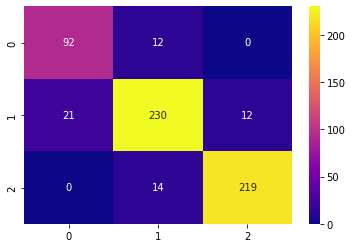


 RESULTATS ACCURACY
Accuracy:  0.9016666666666666
Training Accuracy (entrenat): 0.9741666666666666
Testing Accuracy (test): 0.9016666666666666


In [99]:
rf = RandomForestClassifier(n_estimators=50,max_depth=grid_search.best_params_['max_depth'],min_samples_split=4, min_samples_leaf=2, random_state=20)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

#Fer Prediccions de les dades
y_pred2 = rf.predict(X_test)

print('\n INFORME MODEL SINGLE FOLD CV \n')
print(classification_report(y_test, y_pred2))

#Matriu de confusió
cm = confusion_matrix(y_test, y_pred2)

print("\nMATRIU DE CONFUSIÓ ")
plt.figure(figsize= (6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="plasma")
plt.show()

print("\n RESULTATS ACCURACY")
print("Accuracy: ",accuracy_score(y_test, y_pred2))
print('Training Accuracy (entrenat):',rf.score(X_train,y_train))
print('Testing Accuracy (test):',rf.score(X_test,y_test))

### K-Fold Cross Validation

In [100]:
data_kf = data.copy()

#Estudiants graduats o han abandonat
data_kf = data_kf[(data_kf['Age_group'] == 0) | (data_kf['Age_group'] == 1) | (data_kf['Age_group'] == 2)]

#Passar de categoric a numeral
data_kf['Age_group'] = LabelEncoder().fit_transform(data_kf['Age_group'])
data_kf.shape

(3000, 26)

In [101]:
#guardar a X tots els atributs menys el target, a Y el target
X = data_kf.drop('Age_group', axis=1)
y = data_kf['Age_group']

scaled = scaler.fit_transform(X)
X_train_full, X_test, y_train_full, y_test = train_test_split(scaled, y, test_size=0.2, random_state=42)

In [102]:
#Trobar millor parametre n_neighbors pel model de kfold cross validation
param_grid = {'n_neighbors': range(1, 30)}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train_full, y_train_full)

print("Millor número n_neighors:",grid_search.best_params_['n_neighbors'])

Millor número n_neighors: 18


In [ ]:
# K-Fold Cross-Validation Inicialització
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#metriques
accuracies = []
precisions = []
recalls = []
f1_scores = []

# K-Fold Cross-Validation
for train_index, test_index in kf.split(X_train_full, y_train_full):
    X_train, X_val = X_train_full[train_index], X_train_full[test_index]
    y_train, y_val = y_train_full[train_index], y_train_full[test_index]

    #Model amb el nombre n_neighbors millor trobat
    model = KNeighborsClassifier(n_neighbors=grid_search.best_params_['n_neighbors'])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_val) #Prediccio per cada fold

    # Calculate metrics
    accuracies.append(accuracy_score(y_val, y_pred))
    precisions.append(precision_score(y_val, y_pred, average='weighted'))
    recalls.append(recall_score(y_val, y_pred, average='weighted'))
    f1_scores.append(f1_score(y_val, y_pred, average='weighted'))

#Fer Prediccions de les dades
final_pred = model.predict(X_test)

print('\n INFORME MODEL K FOLD CV \n')
print(classification_report(y_test, final_pred))

#matriu de confusió
cm = confusion_matrix(y_test, final_pred)
print("\nMATRIU DE CONFUSIÓ ")
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="plasma")
plt.show()

# Mitjanes de les k cross-validation
print("\n MITJANES DE CADA FOLD ")
print(f"Average Accuracy: {sum(accuracies) / len(accuracies)}")
print(f"Average Precision: {sum(precisions) / len(precisions)}")
print(f"Average Recall: {sum(recalls) / len(recalls)}")
print(f"Average F1 Score: {sum(f1_scores) / len(f1_scores)}")

KeyError: '[0, 7, 14, 29, 30, 44, 45, 51, 52, 63, 70, 80, 88, 102, 104, 108, 111, 124, 134, 135, 139, 141, 144, 149, 162, 168, 170, 174, 177, 178, 183, 184, 188, 192, 194, 199, 203, 211, 218, 221, 227, 231, 233, 246, 251, 254, 256, 257, 266, 270, 272, 282, 283, 291, 309, 313, 318, 321, 322, 331, 332, 343, 351, 354, 365, 366, 367, 368, 387, 393, 407, 408, 410, 411, 414, 416, 423, 433, 436, 439, 443, 450, 457, 460, 463, 471, 472, 478, 479, 485, 486, 495, 498, 506, 507, 521, 527, 528, 533, 543, 544, 554, 555, 557, 564, 565, 568, 572, 581, 594, 598, 599, 602, 610, 612, 621, 644, 650, 651, 678, 679, 680, 691, 693, 695, 705, 718, 727, 729, 741, 746, 755, 759, 764, 765, 772, 781, 783, 785, 787, 789, 794, 807, 809, 810, 812, 817, 831, 842, 845, 857, 859, 862, 864, 867, 879, 900, 903, 907, 912, 926, 927, 929, 930, 932, 942, 945, 949, 952, 958, 978, 998, 1001, 1005, 1025, 1034, 1036, 1041, 1044, 1047, 1055, 1057, 1078, 1084, 1089, 1090, 1100, 1102, 1103, 1105, 1106, 1116, 1117, 1128, 1134, 1161, 1174, 1177, 1190, 1192, 1195, 1200, 1204, 1210, 1211, 1216, 1222, 1226, 1229, 1230, 1231, 1261, 1263, 1268, 1269, 1270, 1273, 1292, 1299, 1307, 1316, 1322, 1336, 1345, 1351, 1359, 1360, 1362, 1364, 1370, 1385, 1392, 1398, 1399, 1407, 1411, 1412, 1413, 1421, 1429, 1437, 1442, 1467, 1491, 1497, 1502, 1509, 1533, 1547, 1551, 1553, 1556, 1559, 1562, 1567, 1569, 1577, 1578, 1586, 1600, 1606, 1607, 1613, 1614, 1618, 1620, 1624, 1628, 1641, 1659, 1665, 1670, 1691, 1694, 1706, 1710, 1725, 1736, 1738, 1739, 1741, 1744, 1745, 1746, 1748, 1756, 1763, 1770, 1780, 1793, 1798, 1800, 1801, 1804, 1813, 1814, 1817, 1818, 1820, 1830, 1831, 1840, 1847, 1860, 1861, 1868, 1882, 1885, 1904, 1912, 1915, 1920, 1921, 1929, 1939, 1941, 1960, 1963, 1965, 1966, 1967, 1991, 1992, 2001, 2012, 2024, 2025, 2029, 2031, 2045, 2066, 2069, 2083, 2087, 2089, 2093, 2095, 2096, 2097, 2111, 2112, 2114, 2151, 2153, 2155, 2163, 2164, 2166, 2167, 2174, 2175, 2178, 2186, 2206, 2213, 2219, 2225, 2230, 2233, 2234, 2236, 2243, 2254, 2256, 2268, 2272, 2275, 2284, 2290, 2291, 2297, 2303, 2307, 2315, 2323, 2330, 2332, 2342, 2370, 2372, 2376, 2377, 2392, 2394] not in index'

# <b>SAMUEL AQUÍ HO HE DEIXAT</b>

In [ ]:
X = pandas.read_csv('./data/Test.csv', sep=',', na_values=".")

X.replace({"Gender": gender_st}, inplace=True)
X.replace({"Mental Health Status": status_st}, inplace=True)
X.replace({"Smoking Status": smoking_st}, inplace=True)
X.replace({"Alcohol Consumption": drinking_st}, inplace=True)
X.replace({"Medication Use": medication_st}, inplace=True)
X.replace({"Physical Activity Level": physical_st}, inplace=True)
X.replace({"Diet": diet_st}, inplace=True)
X.replace({"Sleep Patterns": sleep_st}, inplace=True)
X.replace({"Income Level": income_st}, inplace=True)
X.replace({"Education Level": education_st}, inplace=True)
X.replace({"Chronic Diseases": chronic_st}, inplace=True)
X.replace({"Family History": chronic_st}, inplace=True)

for i,element in zip(range(len(X['Blood Pressure (s/d)'])),X['Blood Pressure (s/d)']):
    valors = element.split('/')
    estat = 0
    systolic = int(valors[0])
    diastolic = int(valors[1])
    if systolic < 120 and diastolic < 80:
        estat = 0 #healthy
    elif systolic >= 120 and systolic <= 129 and diastolic < 80:
        estat = 1 #elevated
    elif systolic >= 130 and systolic <= 139 or diastolic >= 80 and diastolic <= 89:
        estat = 2 # hypertension 1
    else:
        estat = 3 #hypertension 2
    X.loc[i, 'Blood Pressure (s/d)'] = int(estat)

print(data[:5])

   Gender  Height (cm)  Weight (kg) Blood Pressure (s/d)  Cholesterol Level (mg/dL)     BMI  Blood Glucose Level (mg/dL)  Bone Density (g/cm²)  Vision Sharpness  Hearing Ability (dB)  Physical Activity Level  Smoking Status  Alcohol Consumption  Diet  Chronic Diseases  Medication Use  Family History  Cognitive Function  Mental Health Status  Sleep Patterns  Stress Levels  Pollution Exposure  Sun Exposure  Education Level  Income Level  Age (years)  Age_group
0       0      171.148       86.185                    3                    259.466  29.423                      157.653                 0.133             0.200                58.786                        1               0                    0     0                 0               0               0              44.059                     2               0          2.797               5.142         7.109                0             1           89          2
1       0      172.946       79.642                    2                  

In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {'max_depth': [5, 10, 15, 20, 25]}
grid_search = GridSearchCV(RandomForestClassifier(n_estimators=100, random_state=20), param_grid, cv=5)
grid_search.fit(X, data)

print(grid_search.best_params_['max_depth'])

ValueError: 
All the 25 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 421, in fit
    y, expanded_class_weight = self._validate_y_class_weight(y)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 831, in _validate_y_class_weight
    check_classification_targets(y)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/multiclass.py", line 219, in check_classification_targets
    raise ValueError(
ValueError: Unknown label type: unknown. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.


In [ ]:
split_ratios = [(0.6, 0.2), (0.7, 0.15), (0.8, 0.1)]
results = []
for train_ratio, val_ratio in split_ratios:
    X_train, X_temp, y_train, y_temp = train_test_split(X, data, test_size=1-train_ratio, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=val_ratio/(val_ratio + (1 - train_ratio - val_ratio)), random_state=42)
    
    model = DecisionTreeClassifier()
    model.fit(X_train, y_train)
    
    val_accuracy = accuracy_score(y_val, model.predict(X_val))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))

    results.append({'train_ratio': train_ratio, 'val_ratio': val_ratio, 'val_accuracy': val_accuracy, 'test_accuracy': test_accuracy})

ValueError: Unknown label type: unknown. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

In [ ]:
cv = StratifiedKFold(n_splits=10, random_state=1) 

gnb = GaussianNB()
cv_scores = cross_val_score(gnb,X=X,y=y,cv=cv)
np.mean(cv_scores)

ValueError: Setting a random_state has no effect since shuffle is False. You should leave random_state to its default (None), or set shuffle=True.